In [1]:
import theano.tensor as T
import theano
import numpy as np
from collections import OrderedDict
import negsamp
import sys
import matplotlib.pylab as plt

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 4007)


In [2]:
# %matplotlib notebook
%matplotlib inline

In [4]:
# Params
d = 100
m = 10
lr = 0.001
layers = 1
epochs = 100
weightfile = 'params-ix.npz'

### Load AlexNet Features (fc7) for all of IAPR-TC12

In [5]:
data = np.load('data/iaprtc_alexfc7.npz')
D = open('data/iaprtc_dictionary.txt').read().splitlines()
train_ims = [ im.split('/')[-1] for im in open('data/iaprtc_trainlist.txt').read().splitlines() ]
test_ims = [ im.split('/')[-1] for im in open('data/iaprtc_testlist.txt').read().splitlines() ]
xTr = data['xTr'].T
yTr = data['yTr'].T
xTe = data['xTe'].T
yTe = data['yTe'].T
wc = yTr.sum(axis=0)+0.01-0.01
d = 100
hidden=4096
f = 4096
V = 291
test_ims_full = [ im for im in open('data/iaprtc_testlist.txt').read().splitlines() ]

### Load Weight Files

In [6]:
Wi = theano.shared(np.load(weightfile)['Wi'])
Wc = theano.shared(np.load(weightfile)['Wc'])
if 'Wh' in np.load(weightfile).keys():
    layers=2
    Wh = theano.shared(np.load(weightfile)['Wh'])

### Define neural network function

In [7]:
ns = negsamp.NegativeSampler(wc / wc.sum())

# Define functionality
x = T.vector()
if layers == 1:
    print "Number of layers = 1"
    yh = T.nnet.sigmoid( Wc.dot(Wi.dot(x)) )
else:
    print "Number of layers = 2"
    yh = T.nnet.sigmoid( Wc.dot(Wi.dot(T.nnet.relu(Wh.dot(x)))) )
predictor = theano.function( inputs =[x], outputs = yh, allow_input_downcast=True )

Number of layers = 1


### Randomly select an image and display its results

Looking at the 275th image: images/06/6527.jpg
Predicted: gate, lion, shoe, tee-shirt, girl, table-cloth, grey, hair, wood, stripe, level, life, penguin, terrain, plant, polo, portrait, sock, snow, rock, roof, salt, sky, skull, frame, ship, bank, bit, church, building, floor, clothes, cloud, water, couple, carpet, bush, tree, dirt, area, door, fence, towel, fern, lane, formation, balcony, trunk, bell, grass, railing, house, reflection, river, head, clock, cliff, writing, statue, ridge, pavement, stage, hedge, lot, shelter, shade, cup, waterfall, jungle, path, boy, room, helmet, painting, pillow, jeep, red, courtyard, lamp, glass, monument, orange, vegetation, lake, boat, hand, pant, sea, entrance, picture, brick, bay, cobblestone, country, valley, one
Truth:     brick, house, side, tree


<Container object of 3 artists>

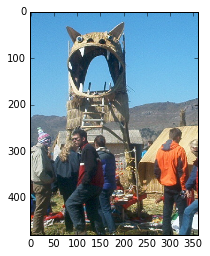

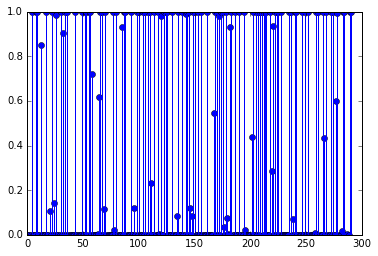

In [11]:
# Randomly select an image
i=np.random.randint(0, yTe.shape[1])

# Run example
input=xTr[i];output=yTr[i];
imname='images/'+test_ims_full[i]+'.jpg';
print "Looking at the "+str(i)+"th image: "+imname
im=plt.imread(imname)

# Prediction
ypwords = [D[j] for j in predictor( input ).argsort()[::-1] [ 0:(predictor(input)>0.5).sum() ] ]
# Truth
ytwords = [D[j] for j in ns.posidx( output ) ]

plt.imshow(im)
print 'Predicted: '+ ', '.join(ypwords)
print 'Truth:     '+ ', '.join(ytwords)

plt.figure()
plt.stem( predictor(input) )

45


<Container object of 3 artists>

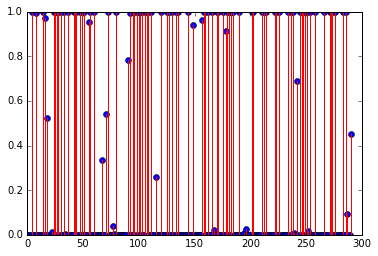

In [10]:
i=np.random.randint(0, yTe.shape[1])
print i
plt.stem( predictor(xTe[i]), 'r' )

In [59]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

array([[ -7.13540298e-01,  -1.13209644e+00,  -4.05706694e+00, ...,
          3.89360403e-01,  -1.25488091e-01,  -1.44462937e-01],
       [ -8.97735619e-01,  -1.46371004e+00,  -4.54370358e+00, ...,
         -1.14847047e-01,  -4.51911309e-01,   4.81486379e-01],
       [ -9.44791716e-01,  -1.37369989e+00,  -3.80862487e+00, ...,
         -2.57628088e-03,  -5.67116321e-01,   5.27051748e-01],
       ..., 
       [ -6.75323702e-01,  -1.88775910e+00,  -4.91190973e+00, ...,
          3.44243048e-01,   1.47608875e-01,   1.27286225e-01],
       [ -3.85451043e-01,  -1.28158302e+00,  -5.06845348e+00, ...,
          3.43225754e-01,  -5.51668577e-01,   1.14257456e-01],
       [ -6.21972009e-01,  -1.85075268e+00,  -5.21143461e+00, ...,
          3.29954309e-01,   1.59899922e-01,   2.90702701e-01]])

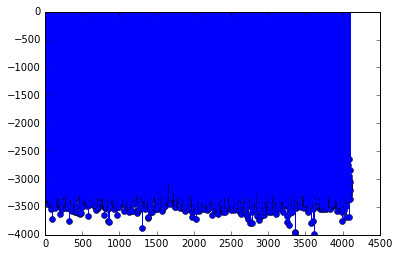

In [85]:
layer0 = (np.dot(Wh.get_value(),xTr[0]))
plt.stem(layer0)
Wh.get_value()